In [1]:
from scipy.signal import convolve2d
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import random

In [2]:
data = ImageDataGenerator()

In [3]:
type(data)

keras.preprocessing.image.ImageDataGenerator

In [4]:
# read the training images from directory and classify them
train_images = data.flow_from_directory('data/train', classes=['dogs', 'cats'])

Found 40 images belonging to 2 classes.


In [5]:
# read the training images from directory and classify them
test_images = data.flow_from_directory('data/test', classes=['dogs', 'cats'])

Found 20 images belonging to 2 classes.


In [6]:
type(train_images)

keras.preprocessing.image.DirectoryIterator

In [7]:
train_images.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
for image_batch, labels_batch in train_images :
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 2)


The image_batch is a tensor of the shape (32, 256, 256, 3).  

This is a batch of 32 images of shape 256x256x3.  

The label_batch is a tensor of the shape 32, these are corresponding labels to the 32 images. 

In [9]:
# list file names
lst_cats_train = os.listdir('data/train/cats')
lst_dogs_train = os.listdir('data/train/dogs')

In [10]:
# categorize 0 for cats and 1 for dogs
categories = []

for image in lst_cats_train:
    category = image.split('.')[0]
    categories.append(0)
  
for image in lst_dogs_train:
    category = image.split('.')[0]
    categories.append(1)
    
df = pd.DataFrame({'filename': lst_cats_train + lst_dogs_train,
                  'category': categories})

In [11]:
# cat = 0, dog = 1
df

,filename,category
0,1.jpg,0
1,10.jpg,0
2,11.jpg,0
3,12.jpg,0
4,13.jpg,0
5,14.jpg,0
6,15.jpg,0
7,16.jpg,0
8,17.jpg,0
9,18.jpg,0


<AxesSubplot:>

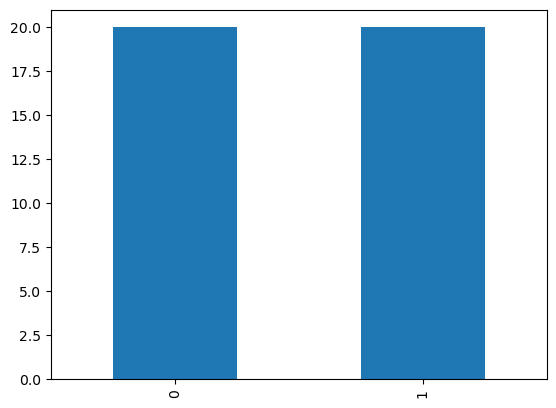

In [12]:
df.category.value_counts().plot.bar()

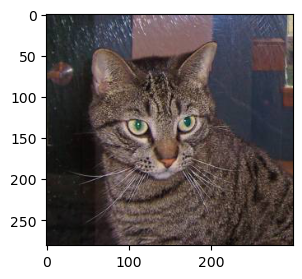

In [13]:
# Sample image of a cat
plt.figure(figsize=(5, 3))

image_cat = load_img('data/train/cats/' + lst_cats_train[0])

plt.imshow(image_cat)

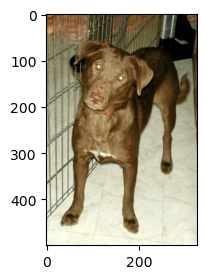

In [14]:
# Sample images of a dog
plt.figure(figsize=(5, 3))

image_dog = load_img('data/train/dogs/' + lst_dogs_train[0])

plt.imshow(image_dog)

### Train a model

In [15]:
model = tf.keras.models.Sequential()

# The RGB channel values are in the [0, 255] range. 
# Standardize values to be in the [0, 1] range 
model.add(tf.keras.layers.Rescaling(1./255))

# First layer 
model.add(tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(256,256,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Second layer 
model.add(tf.keras.layers.Conv2D(64, (5,5), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())

In [16]:
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [17]:
# Compiling with loss layer and optimization 
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
# Build the model
model.build(input_shape=(32,256,256,3))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 252, 252, 32)        2432      
                                                                 
 batch_normalization (BatchN  (32, 252, 252, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 122, 122, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (32, 122, 122, 64)       2

<AxesSubplot:>

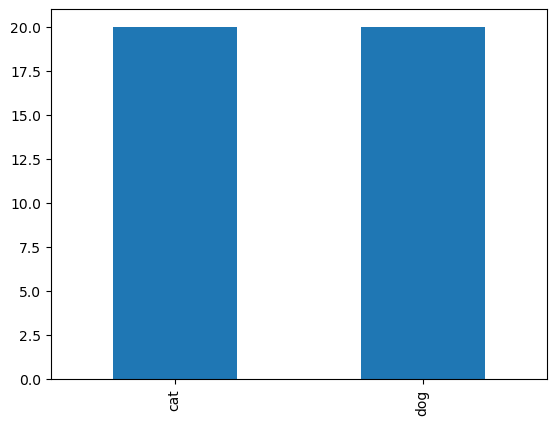

In [20]:
# Plotting training data 

df['category'] = df['category'].replace({0:'cat', 1:'dog'})
df.category.value_counts().plot.bar()

In [21]:
# list file names
lst_cats_test = os.listdir('data/test/cats')
lst_dogs_test = os.listdir('data/test/dogs')


In [22]:
# categorize 0 for cats and 1 for dogs
categories = []

for image in lst_cats_test:
    category = image.split('.')[0]
    categories.append(0)
  
for image in lst_dogs_test:
    category = image.split('.')[0]
    categories.append(1)
    
df_test = pd.DataFrame({'filename': lst_cats_test + lst_dogs_test,
                  'category': categories})

<AxesSubplot:>

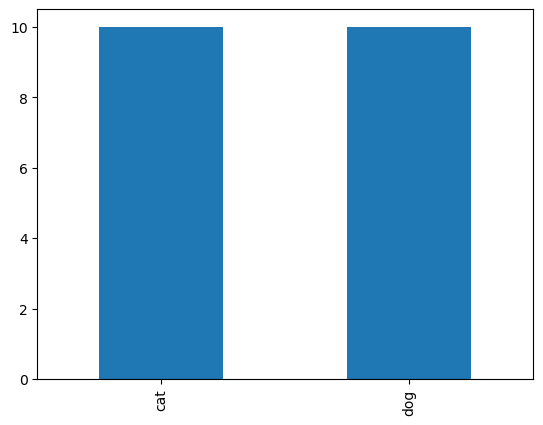

In [23]:
# converting into 0 = cat and 1 = dog
df_test.category = df_test.category.replace({0:'cat', 1:'dog'})

df_test.category.value_counts().plot.bar()

In [24]:
model.fit(train_images, epochs=100, batch_size=10, validation_data=test_images)

Epoch 1/100
2/2 [==============================] - 25s 8s/step - loss: 1.1024 - accuracy: 0.4500 - val_loss: 2.1501 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 26s 9s/step - loss: 0.5859 - accuracy: 0.7000 - val_loss: 0.8775 - val_accuracy: 0.3000
Epoch 3/100
2/2 [==============================] - 22s 7s/step - loss: 0.3720 - accuracy: 0.8250 - val_loss: 0.7285 - val_accuracy: 0.3500
Epoch 4/100
2/2 [==============================] - 20s 17s/step - loss: 0.3493 - accuracy: 0.9000 - val_loss: 0.7678 - val_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 21s 17s/step - loss: 0.2919 - accuracy: 0.8750 - val_loss: 0.7613 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 19s 6s/step - loss: 0.1639 - accuracy: 0.9500 - val_loss: 0.7486 - val_accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 28s 24s/step - loss: 0.2284 - accuracy: 0.9250 - val_loss: 0.7468 - val_accuracy: 0.5500
Epoch 8/100
2/2 [=======

2/2 [==============================] - 18s 15s/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 0.7394 - val_accuracy: 0.4000
Epoch 60/100
2/2 [==============================] - 19s 15s/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.7738 - val_accuracy: 0.4000
Epoch 61/100
2/2 [==============================] - 18s 15s/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.7582 - val_accuracy: 0.4500
Epoch 62/100
2/2 [==============================] - 19s 15s/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 0.7354 - val_accuracy: 0.4500
Epoch 63/100
2/2 [==============================] - 19s 6s/step - loss: 0.0471 - accuracy: 0.9750 - val_loss: 0.7562 - val_accuracy: 0.4500
Epoch 64/100
2/2 [==============================] - 19s 6s/step - loss: 0.0476 - accuracy: 1.0000 - val_loss: 0.7364 - val_accuracy: 0.5000
Epoch 65/100
2/2 [==============================] - 19s 15s/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.7716 - val_accuracy: 0.4500
Epoch 66/100
2/2 [==========

In [25]:
loss, accuracy = model.evaluate(test_images)

1/1 [==============================] - 3s 3s/step - loss: 0.8237 - accuracy: 0.5000


Accuracy is very less. More training is required 

In [ ]:
# fit the model - 300 iterations
model_fit_300 = model.fit(train_images, epochs=300, batch_size=10, validation_data=test_images)

Epoch 1/300
2/2 [==============================] - 26s 22s/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.8197 - val_accuracy: 0.4500
Epoch 2/300
2/2 [==============================] - 23s 7s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.8248 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 21s 17s/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.8893 - val_accuracy: 0.4000
Epoch 4/300
2/2 [==============================] - 22s 7s/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.8668 - val_accuracy: 0.4000
Epoch 5/300
2/2 [==============================] - 23s 19s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.8581 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 22s 18s/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.8935 - val_accuracy: 0.4000
Epoch 7/300
2/2 [==============================] - 21s 7s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.8884 - val_accuracy: 0.4000
Epoch 8/300
2/2 [======

2/2 [==============================] - 21s 17s/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 1.2294 - val_accuracy: 0.3500
Epoch 60/300
2/2 [==============================] - 21s 7s/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 1.1410 - val_accuracy: 0.3500
Epoch 61/300
2/2 [==============================] - 21s 18s/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 1.0557 - val_accuracy: 0.4000
Epoch 62/300
2/2 [==============================] - 21s 7s/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.0618 - val_accuracy: 0.4000
Epoch 63/300
2/2 [==============================] - 21s 17s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.9800 - val_accuracy: 0.4500
Epoch 64/300
2/2 [==============================] - 10824s 9s/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.1744 - val_accuracy: 0.3500
Epoch 65/300
2/2 [==============================] - 22s 17s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.1921 - val_accuracy: 0.3500
Epoch 66/300
2/2 [========

In [ ]:
# loss and accuracy after 300 iterations
loss, accuracy = model.evaluate(test_images)

Accuracy is not affected after 300 iterations. One of the reasons could be less sample imaged for learning.

In [ ]:
pred = model.predict(test_images)

In [ ]:
df_test['pred_category']  = np.argmax(pred, axis=1)

In [ ]:
df_test['pred_category'] = df_test['pred_category'].replace({0:'cat', 1: 'dog'})

In [ ]:
df_test.head(10)